In [171]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [172]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [173]:
y.shape, tx.shape

((202,), (202, 2))

# Computing the Cost Function
Fill in the the `compute_cost` function below:

In [174]:
def compute_loss(y, tx, w, mae = True):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    loss = 0
    N = y.shape[0]
    e = y-np.dot(tx,w)
    
    if not mae:
        loss = 1/(2*N) * (np.dot(np.transpose(e),e))
    else:
        loss = 1/N * np.sum(np.absolute(e))

    return loss


# Grid Search

Fill in the function `grid_search()` below:

In [175]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    for idx, i in enumerate(w0):
        for idx2, j in enumerate(w1):
            losses[idx][idx2] = compute_loss(y, tx, [i,j])
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=5.350259618178881, w0*=73.36683417085428, w1*=15.829145728643226, execution time=0.768 seconds


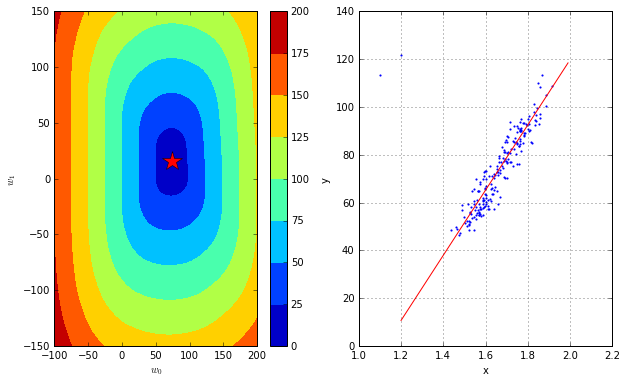

In [176]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization
import datetime

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=200)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [177]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    N = y.shape[0]
    e = y-np.dot(tx,w)
    
    return -1/N * np.dot(np.transpose(tx), np.sign(e))

Please fill in the functions `gradient_descent` below:

In [178]:
def gradient_descent(y, tx, initial_w, max_iters, gamma): 
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        grad = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * grad
        # store w and loss
        ws.append(np.copy(w))
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [179]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.9

# Initialization
w_initial = np.array([0.0, 0.0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=74.06780585492638, w0=0.9, w1=7.855102706902345e-16
Gradient Descent(1/49): loss=73.16780585492637, w0=1.8, w1=1.571020541380469e-15
Gradient Descent(2/49): loss=72.26780585492638, w0=2.7, w1=2.3565308120707034e-15
Gradient Descent(3/49): loss=71.36780585492637, w0=3.6, w1=3.142041082760938e-15
Gradient Descent(4/49): loss=70.46780585492637, w0=4.5, w1=3.927551353451173e-15
Gradient Descent(5/49): loss=69.56780585492639, w0=5.4, w1=4.7130616241414076e-15
Gradient Descent(6/49): loss=68.66780585492639, w0=6.300000000000001, w1=5.498571894831642e-15
Gradient Descent(7/49): loss=67.76780585492638, w0=7.200000000000001, w1=6.284082165521877e-15
Gradient Descent(8/49): loss=66.86780585492637, w0=8.100000000000001, w1=7.069592436212112e-15
Gradient Descent(9/49): loss=65.96780585492637, w0=9.000000000000002, w1=7.855102706902346e-15
Gradient Descent(10/49): loss=65.06780585492638, w0=9.900000000000002, w1=8.64061297759258e-15
Gradient Descent(11/49): loss=64.1678

<function __main__.plot_figure>

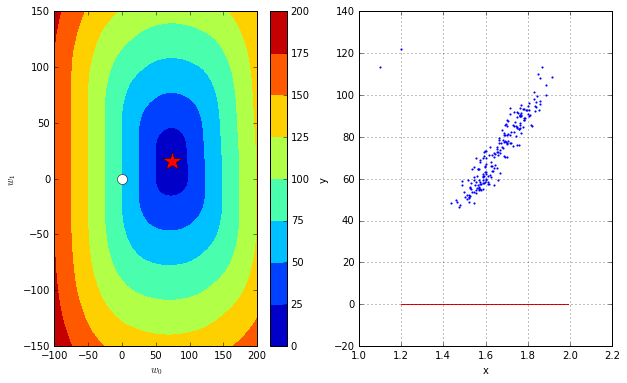

In [180]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# Stochastic gradient descent

In [181]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient for batch data."""
    N = y.shape[0]
    e = y-np.dot(tx,w)

    return -1/N * np.dot(np.transpose(tx), e)


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_epochs, gamma):
    losses = []
    ws = [initial_w]
    w = initial_w
    for n_iter in range(max_epochs):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            grad = compute_stoch_gradient(minibatch_y, minibatch_tx, w)
            loss = compute_loss(y, tx, w)
            losses.append(loss)

            w = w - gamma * grad
            ws.append(w)
    return losses, ws

In [182]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.4
batch_size = 4

# Initialization
w_initial = np.array([0.0, 0.0])

# Start SGD.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD: execution time=0.007 seconds


<function __main__.plot_figure>

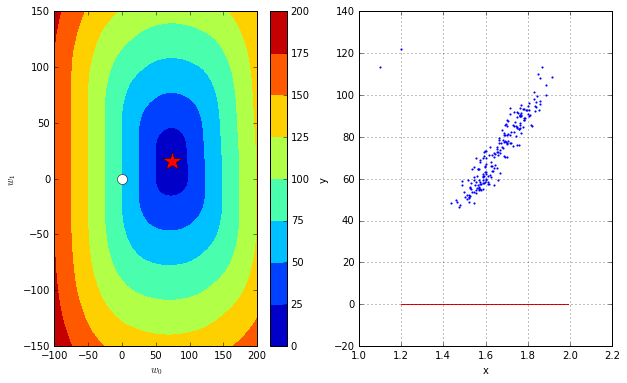

In [183]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))